# COURSE: Master statistics and machine learning: Intuition, Math, code

##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304

## SECTION: The t-test family

### VIDEO: Signed-rank test (Wilcoxon signed-rank for one-sample or paired samples)

#### TEACHER: Mike X Cohen, sincxpress.com


In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

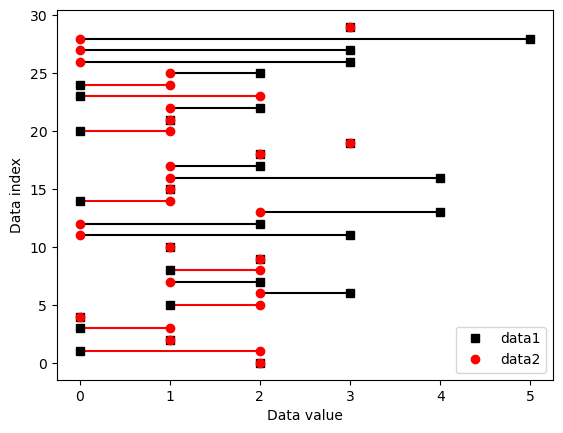

In [2]:
## generate the data

N = 30

# generated data - assumed to be linked, that they come from the same data, same individuals just measured at different points etc.
# note we use poisson noise so the data is not normally distributed
data1 = np.random.poisson(1.5,N)
data2 = np.random.poisson(1,N)

colors = 'kr'
for i in range(N):
    # data index is on the y axis, data value on the x axis, line is drawn between them
    # lines connecting points are black if data1 is larger value or red if data2 is a larger value
    xaxis = [data1[i], data2[i]]
    yaxis = [i,i]
    plt.plot(xaxis,yaxis,colors[int(data1[i]<data2[i])])

# a square represents point from data1 set and circle is a point from data2 set
plt.plot(data1,np.arange(N),'ks',markerfacecolor='k',label='data1')
plt.plot(data2,np.arange(N),'ro',markerfacecolor='r',label='data2')

plt.ylabel('Data index')
plt.xlabel('Data value')
plt.legend()

plt.show()

In [3]:
## now for the test

# we use wilcoxon function from scipy stats package to run the nonparametric t-test on the data
# returns the t statistic and the p value
t,p = stats.wilcoxon(data1,data2)
print('Wilcoxon z=%g, p=%g'%(t,p))

# Note that we are not setting a threshold - we can set that separately and then compare it with the p-val returned to decide whether to reject the null hypothesis or not
# ex: if our threshold is .05, then if the p-val is less than or equal to 0.05, we reject the null hypothesis

# The P-value (p) is telling us how likely that we would get a Z value of the Wilcoxon z= size shown if the two data samples were drawn from a distribution with the same median
# it represents the probability of observing the given test statistic (Wilcoxon signed-rank statistic) or more extreme values, assuming the null hypothesis is true.

Wilcoxon z=63, p=0.109196


c:\anaconda\envs\pytorch2023\lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


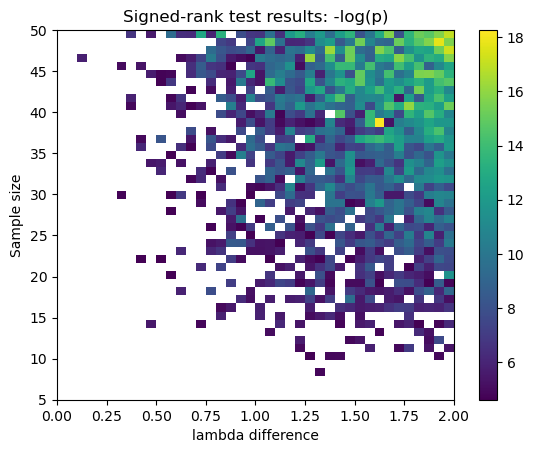

In [5]:
## now for the 2D space

# parameter ranges
Ns = np.arange(5,51)
lambdas = np.linspace(1,3,40) # range of values from 1 to 3 - used in below loop for fixed/varying lambda parameters

# initialize output matrix
pvals = np.zeros((len(Ns),len(lambdas)))

for ni in range(len(Ns)):
    for li in range(len(lambdas)):
        
        # generate some data, non normally distributed, assumed to be linked datasets
        data1 = np.random.poisson(lambdas[0], Ns[ni]) # has a fixed lambda parameter (just range of 1 to 1)
        data2 = np.random.poisson(lambdas[li],Ns[ni]) # has a lambda parameter that will vary over the loop according to 1 to 3
        
        # compute the statistic using the signed-rank test function
        t,p = stats.wilcoxon(data1,data2)
        
        # store the results
        pvals[ni,li] = -np.log(p) # - log of the p value: this makes small p values closer to zero be large magnitude positive numbers (the - flips the negative result of the log when used between 0 and 1, i.e. as log of numbers close to zero are taken they get closer to negative infinity)
        # this is often done in optimization and allows you to make finer distinctions between p-values
        

# optional p-value thresholding
pvalthresh = .01
# find any values in matrix plotted below where the pval is smaller than the negative (flipped) log of .01
pvals[ pvals<-np.log(pvalthresh) ] = np.NaN # this makes these squares white or empty in the plot


# now show in a heatmap! explained around 17:00 in https://www.udemy.com/course/statsml_x/learn/lecture/20025064
# this plot will show that there are large -log p-values (which translate to small p-values close to zero) when we have a combination of a large sample size and large lambda difference/shift between the mean of the two distributions
plt.imshow(pvals,origin='lower',extent=[lambdas[0]-1,lambdas[-1]-1,Ns[0],Ns[-1]],aspect='auto')
plt.xlabel('lambda difference') # x-axis is lambda diff between datasets from 0 up to 2
plt.ylabel('Sample size') # yaxis is sample size of data from 5 up to 50
plt.title('Signed-rank test results: -log(p)')
plt.colorbar()
plt.show()